# Mean shift
Segmentación basada en el algoritmo de corrimiento de medias

In [2]:
import cv2 as cv
import supervision as sv

###  Leemos la imagen

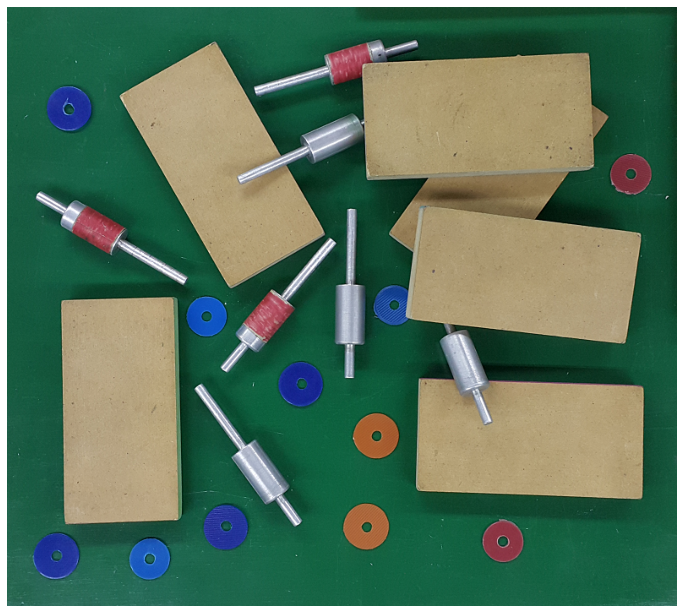

In [3]:
# Cargamos la imagen y la binarizamos por el método de Otzu
img = cv.imread('piezas.png')
sv.plot_image(img)

### Corremos mean shift

La función cv.meanShift de OpenCV está pensada para hacer tracking (seguimiento) de una ventana predefinida en una secuencia de imágenes. Sin embargo existe la función cv.pyrMeanShiftFiltering() que funciona para segmentación de imágenes tal cual lo vimos en las clases teóricas.

Realiza una posterización de la imagen (grupos de colores) basados tanto en el espacio de color como en el espacio (X,Y) de la imagen. Por tanto tiene parámetros de radio de ventana de búsqueda tanto para color (sr) como para distancia relativa a cada píxel (sp)

- (x,y):X−sp≤x≤X+sp
- Y−sp≤y≤Y+sp
- ||(R,G,B)−(r,g,b)||≤sr

Al terminar las iteraciones cada píxel es asignado al color promedio de la última iteración

Cuando maxLevel> 0 (por defecto maxLevel=1), se construye una pirámide gaussiana de niveles maxLevel + 1, y el procedimiento anterior se ejecuta primero en la capa de menor resolución. Después de eso, los resultados se propagan a la capa de mayor resolución y las iteraciones se ejecutan nuevamente solo en aquellos píxeles donde los colores de la capa difieren en más de sr de la capa de resolución más baja de la pirámide. Eso hace que los límites de las regiones de color sean más nítidos. (Los resultados difieren de utilizar mean shift directamente sobre la imagen original, maxLevel=0)

#### Con parámetros por defecto (maxLevel=1)

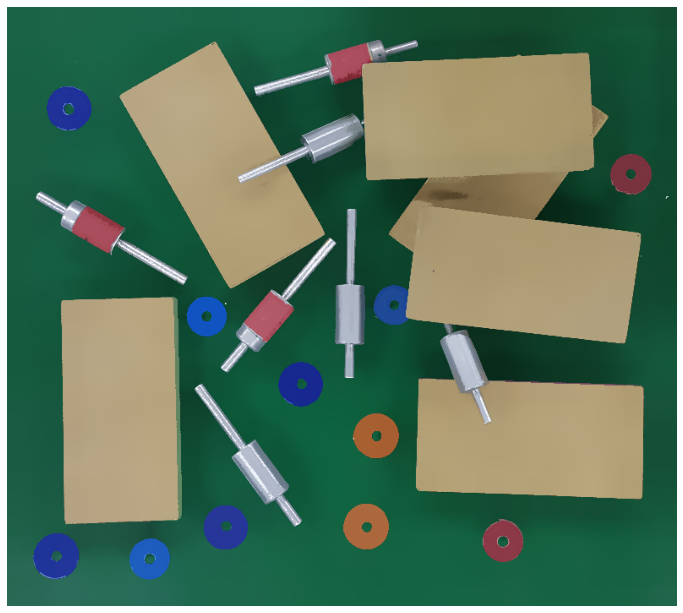

In [4]:
# Radio para la ventana espacial
sp = 20
# Radio para la ventana color
sr = 40

# Corremos el filtrado (segmentación)
img_out=cv.pyrMeanShiftFiltering(img, sp, sr)

# Mostramos el resultado
sv.plot_image(img_out)

#### Corriendo sobre la imagen a resolución original

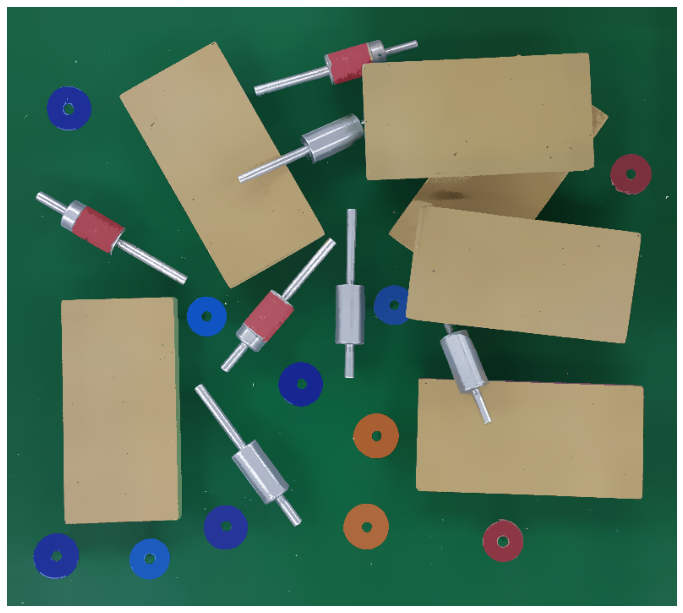

In [5]:
# Radio para la ventana espacial
sp = 20
# Radio para la ventana color
sr = 40

# Corremos el filtrado (segmentación)
img_out=cv.pyrMeanShiftFiltering(img, sp, sr, maxLevel = 0)

# Mostramos el resultado
sv.plot_image(img_out)